In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
import pandas as pd
import matplotlib.lines as lines
import matplotlib.patches as patches


In [6]:
file = pd.read_excel('Tdata.xlsx')
file

,Load,Elongation,strain (mm/mm),stress N/mm2,stress in Pa
0,0.00,0.0000,0.000000,0.000000e+00,0.000000e+00
1,12.25,0.0187,0.000201,2.496836e+08,2.496836e+14
2,24.52,0.0250,0.000269,4.997748e+08,4.997748e+14
3,36.78,0.0301,0.000324,7.496622e+08,7.496622e+14
4,49.05,0.0359,0.000386,9.997534e+08,9.997534e+14
5,61.31,0.0403,0.000433,1.249641e+09,1.249641e+15
6,73.57,0.0452,0.000486,1.499528e+09,1.499528e+15
7,85.83,0.0505,0.000543,1.749416e+09,1.749416e+15
8,98.10,0.0550,0.000591,1.999507e+09,1.999507e+15
9,110.36,0.0600,0.000645,2.249394e+09,2.249394e+15


In [7]:
load = np.array([0,12.25,24.52,36.78,49.05,61.31,73.57,85.83,98.1,110.36,122.62,134.88,147.15,159.41,171.67,183.94,196.2])
elong = np.array([0,0.0187,0.025,0.0301,0.0359,0.0403,0.0452,0.0505,0.0550,0.0600,0.0650,0.0701,0.0751,0.0809,0.0851,0.0951,0.1195])
area = 4.90625e-8
stress = (load/area)/(10**-6)
print(stress)

[0.00000000e+00 2.49681529e+14 4.99770701e+14 7.49656051e+14
 9.99745223e+14 1.24963057e+15 1.49951592e+15 1.74940127e+15
 1.99949045e+15 2.24937580e+15 2.49926115e+15 2.74914650e+15
 2.99923567e+15 3.24912102e+15 3.49900637e+15 3.74909554e+15
 3.99898089e+15]


In [8]:
l = 93
strain = elong/l
print(strain)

[0.         0.00020108 0.00026882 0.00032366 0.00038602 0.00043333
 0.00048602 0.00054301 0.0005914  0.00064516 0.00069892 0.00075376
 0.00080753 0.00086989 0.00091505 0.00102258 0.00128495]


The slope of the graph i.e Young's modulus is 3810148342.721159 GPa
The y - intercept of the graph is -293659383731055.0
The resilience is 1916.8750586465999 GPa
The yield stress is 3749095540.0 MPa
The Ultimate Tensile Strength is 4000000000.0 MPa
Therefore the given material is brittle


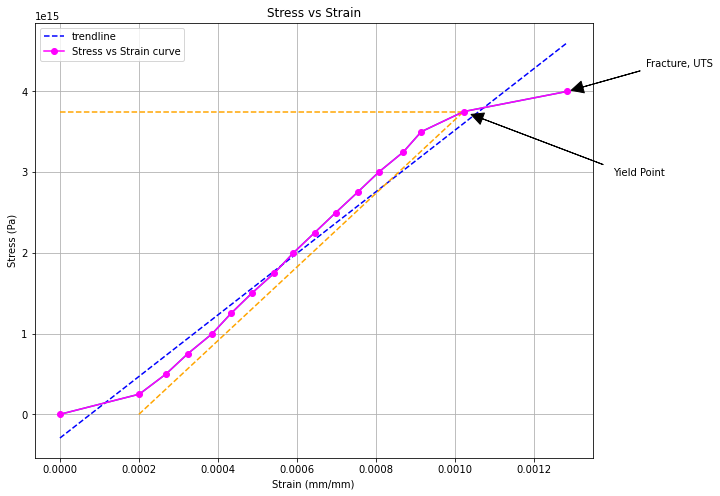

In [12]:
plt.plot(strain,stress)
plt.xlabel('Strain (mm/mm)')
plt.ylabel('Stress (Pa)')
plt.title('Stress vs Strain')
slope, intercept = np.polyfit(strain, stress, 1)
print("The slope of the graph i.e Young's modulus is {} GPa".format(slope/1e9))
print("The y - intercept of the graph is {}".format(intercept))
UTS = 4e+15/1e6
yp = 3.74909554e+15/1e6
re = 0.5*(0.00102258)*(3.74909554e+15)/1e9
print("The resilience is {} GPa".format(re))
print("The yield stress is {} MPa".format(yp))
print("The Ultimate Tensile Strength is {} MPa".format(UTS))
print("Therefore the given material is brittle")
plt.grid()
abline_values = [slope * i + intercept for i in strain]
plt.plot(strain, abline_values, '--',color='blue',label='trendline')

plt.annotate('Fracture, UTS', xy=(0.00128495,3.99898089e+15), xytext=(0.00148495, 4.29898089e+15),
            arrowprops=dict(facecolor='black', shrink=0.05,width = 0.01),
            )
plt.annotate('Yield Point', xy=(0.00102258,3.74909554e+15), xytext=(0.0014,2.94909554e+15 ),
            arrowprops=dict(facecolor='black', shrink=0.05,width = 0.01),
            )

x2 = [0.0002,0.00102258]
y2 = [0,3.74909554e+15]
x3 = [0,0.00102258]
y3 = [3.74909554e+15,3.74909554e+15]
plt.plot(x3,y3,linestyle='--',color='orange')
plt.plot(x2,y2,linestyle="--",color='orange')
plt.rcParams["figure.figsize"] = (10, 8)
plt.plot(strain, 
        stress,
        marker = 'o',
        color = 'magenta',label='Stress vs Strain curve')
plt.legend()

